# MNIST Handwritten Digit Recognizer using CNN
![MNIST Dataset](https://corochann.com/wp-content/uploads/2017/02/mnist_plot-800x600.png)
   
>**Frameworks**
* [Tensorflow v2](https://tensorflow.org) - A open sourced machine learning framework from Google.
* [Keras](https://keras.io) - A open sourced neural network library running on top of tensorflow.


>### Process flow on MNIST DATA SET ANALYSIS
1. [Importing Basic Libraries](#1)
2. [Reading Dataset](#2)
3. [Model Building](#3)
4. [Model Fitting](#4)
5. [Analyzing the model](#5)
6. [Predicting on test data](#6)




>### 1. Importing the Libraries <a></a>
Here we are importing the required libraries for the kernel.

In [15]:
# Importing Tensorflow and keras
# Keras is built into TF 2.0

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Setting the Theme of the data visualizer Seaborn
sns.set(style="dark",context="notebook",palette="muted")

#Tensorflow Version
print("TensorFlow Version:   "+tf.version.VERSION)
print("Keras Version:   "+tf.keras.__version__)

TensorFlow Version:   2.18.0
Keras Version:   3.8.0


>Downloading dataset directly from Kaggle using below command

In [16]:
#!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586786311&Signature=Uvgt7po%2BlFPN4jKzPgTEk6uxrrdX4j%2FNa9C%2Fnn3heahlvHMG27Jde%2BDu7K67sHX%2BFJObrRTVaYMzRPAzu06fuwNsIuxwUEFrKBOfFelX%2F%2FeQ3W5CSEgXU%2BOOJS7n9NOtl0M8HcIyPyQ%2B9G5hGbwH8hIbBYgPMyOTW%2F0zR7zSkIgQPp1foGmtR869sjyh38Be%2BVr9bBDtNOO6camUx7jRfoE6BcBbxu17EQCBIhGXfYN8ZMpRkf3sa9Os273JwolS7H6uqLwGWrp9C30rsc76ZYAFVCu%2Bj%2B0h0O9q2n0e1hoJcNb208EPcgWeOF5DeVwg%2Br7vkiKrLA3yzTONNE8q5A%3D%3D&response-content-disposition=attachment%3B+filename%3Ddigit-recognizer.zip" -c -O 'digit-recognizer.zip'

>Unzipping the folder

In [17]:
#!unzip /content/digit-recognizer.zip

### 2. Preparing the Dataset

read_csv is used to return a pandas DataFrame object from conversion of csv file.

Then we select the label column and store it in Y_train which is used for the training. X_train contains the pixel values of the respective labelled image.

We visualize the total number of data of each class using countplot.Then, we check for missing values in the dataset.

In [18]:
train = pd.read_csv("https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/refs/heads/main/data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/refs/heads/main/data/test.csv")


,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


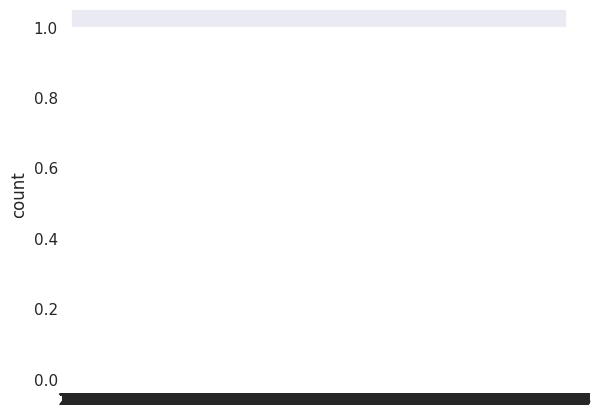

In [19]:
Y_train = train['label']

#Dropping Label Column
X_train = train.drop(labels=['label'],axis=1)

#free up some space
del train

# Bar plot using Seaborn
graph = sns.countplot(Y_train)

Y_train.value_counts()

In [20]:
#identifying for any null or missing values
X_train.isnull().any().describe()

test.isnull().any().describe()


,0
count,784
unique,1
top,False
freq,784


>### Normalisation
Normalisation is implemented to reduce the scale of the input values.

-Normally The pixel value ranges from 0 to 255 which specify gradient of gray.

-The CNN will converge more faster on values 0 to 1 than 0 to 255. hence we divide every value by 255 to scale the data from [0..255] to [0..1]. The same will help model to learn better on features by decreasing computational complexities that too when we have data that scales bigger.

In [21]:
X_train = X_train/255
test = test/255

>### Reshape
The array of pixel values are reshaped into a (28,28,1) matrix. Now can pass the same to CNN model with input_shape of 28x28x1 matrix.

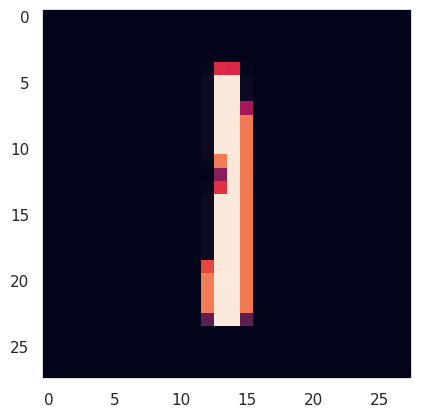

In [22]:
plt.imshow(X_train.values.reshape(-1,28,28,1)[2][:,:,0])

In [23]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

>### Label Encoding
Since the CNN model will give results in a vector of predictions for each classes. The label (numbers) are encoded into hot vector for prediction by the model. So that we can train the CNN with the encoded outputs and the parameters are tuned accordingly

In [24]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0] ->7

>### Train and Validation Data Split
We are segmenting the input data for training into two exclusive data namely, Train and Validation data sets. Train data is used to train the model whereas the validation data is used for cross verification of the model's accuracy and how well the model is generalized for the data other than training data. Validation accuracy and loss will tell us the performance of the model for new data and it will show if there is overfitting or underfitting situation while model training.


In [25]:
#Spliting Train and test set
random_seed =2

X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,
                                                random_state = random_seed)

## 3. Model Building

Deep Convolutional Neural Network is a network of artificial neural networks. A model archiecture is the design of the neural networks with which we train the parameters in training process. Here we used LeNet-5 Architecture, it was proposed by Yann LeCun in 1998. Its pretty popular for its minimal structure and easy to train nature. LeNet-5 architecture is suitable for recognition and classification of different classes of objects in small resolution images.

To learn more about CNN architectures and current state-of-the-art architecture, take a visit [here](https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)

![Deep CNN Architecture](https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png)

In [26]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 ->
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Optimizers and Annealers
* Optimizer is very important part in a neural network. Optimizer ensure the model reaches the optimium faster. RMSProp optimizer makes the model converge more effectively and faster. It also stricts the model to coverge at global minimum therefore the accuracy of the model will be higher.  
* Setting the learning rate is very important in a Deep Learning algorithm. Though choosing a good learning rate may yield its goodness, scheduling a reduction in learning rate while training has a great advantage in convergence at global minimum. ReduceLRonPlateau makes the Learning Rate to reduce at a rate by monitoring the learning rate and epoch. It will greatly help the model to achieve maximum accuracy.

In [28]:
#Defining Optimizer

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [29]:
#Compiling Model

model.compile(optimizer = optimizer, loss='categorical_crossentropy',
             metrics=["accuracy"])

In [30]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [31]:
epochs=30
batch_size = 112

### Data Augmentation
Data Augmentation is the process of creating more dataset for training by manipulating the given images. In Deep learning, the availability of large dataset is very vital for the training. Since we have limited real world training samples, we can use data augementation to create more images for training. Data Augmentation involves zoom, rotating, flip, crop and other image manipulations over the available datasets to create further more data for training. Data Augmentation makes the model to classify more generally.

In [32]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

## 4. Model Fitting
   Model Fitting or Model Training is where we train our model and evaluate the error parameters. Training process typically take a lot of time when it runs in a CPU. But the training can be speeeded up with the graphics card that have CUDA support. Kaggle have inbuilt limited GPU Support be sure to turn it on when running this cell.

In [33]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available.. Just wait a few moments...")
else:
    print("CUDA not Available.. May the force be with you.")

CUDA Available.. Just wait a few moments...


In [35]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


337/337 - 24s - 72ms/step - accuracy: 0.8615 - loss: 0.4232 - val_accuracy: 0.9812 - val_loss: 0.0625 - learning_rate: 1.0000e-03
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9732 - loss: 0.1349 - val_accuracy: 0.9764 - val_loss: 0.0715 - learning_rate: 1.0000e-03
Epoch 3/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


337/337 - 12s - 35ms/step - accuracy: 0.9658 - loss: 0.1141 - val_accuracy: 0.9850 - val_loss: 0.0498 - learning_rate: 1.0000e-03
Epoch 4/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9286 - loss: 0.3347 - val_accuracy: 0.9876 - val_loss: 0.0451 - learning_rate: 1.0000e-03
Epoch 5/30
337/337 - 12s - 34ms/step - accuracy: 0.9753 - loss: 0.0816 - val_accuracy: 0.9886 - val_loss: 0.0388 - learning_rate: 1.0000e-03
Epoch 6/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9911 - loss: 0.0345 - val_accuracy: 0.9888 - val_loss: 0.0371 - learning_rate: 1.0000e-03
Epoch 7/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


337/337 - 20s - 58ms/step - accuracy: 0.9796 - loss: 0.0680 - val_accuracy: 0.9919 - val_loss: 0.0339 - learning_rate: 1.0000e-03
Epoch 8/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 0s - 1ms/step - accuracy: 0.9821 - loss: 0.0353 - val_accuracy: 0.9862 - val_loss: 0.0497 - learning_rate: 1.0000e-03
Epoch 9/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


337/337 - 21s - 61ms/step - accuracy: 0.9820 - loss: 0.0584 - val_accuracy: 0.9917 - val_loss: 0.0256 - learning_rate: 1.0000e-03
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 0s - 1ms/step - accuracy: 0.9911 - loss: 0.0514 - val_accuracy: 0.9921 - val_loss: 0.0273 - learning_rate: 1.0000e-03
Epoch 11/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


337/337 - 12s - 34ms/step - accuracy: 0.9839 - loss: 0.0537 - val_accuracy: 0.9921 - val_loss: 0.0262 - learning_rate: 1.0000e-03
Epoch 12/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9821 - loss: 0.0419 - val_accuracy: 0.9921 - val_loss: 0.0271 - learning_rate: 1.0000e-03
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


337/337 - 12s - 35ms/step - accuracy: 0.9855 - loss: 0.0502 - val_accuracy: 0.9933 - val_loss: 0.0230 - learning_rate: 1.0000e-03
Epoch 14/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.9931 - val_loss: 0.0231 - learning_rate: 1.0000e-03
Epoch 15/30
337/337 - 19s - 57ms/step - accuracy: 0.9861 - loss: 0.0461 - val_accuracy: 0.9933 - val_loss: 0.0254 - learning_rate: 1.0000e-03
Epoch 16/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9938 - val_loss: 0.0255 - learning_rate: 1.0000e-03
Epoch 17/30
337/337 - 11s - 34ms/step - accuracy: 0.9872 - loss: 0.0428 - val_accuracy: 0.9924 - val_loss: 0.0278 - learning_rate: 1.0000e-03
Epoch 18/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9911 - loss: 0.0612 - val_accuracy: 0.9940 - val_loss: 0.0232 - learning_rate: 1.0000e-03
Epoch 19/30
337/337 - 20s - 60ms/step - accuracy: 0.9875 - loss: 0.0395 - val_accuracy: 0.9929 - val_loss: 0.0255 - learning_rate: 1.0000e-03
Epoch 20/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9821 - loss: 0.0308 - val_accuracy: 0.9929 - val_loss: 0.0234 - learning_rate: 1.0000e-03
Epoch 21/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


337/337 - 12s - 35ms/step - accuracy: 0.9882 - loss: 0.0394 - val_accuracy: 0.9943 - val_loss: 0.0208 - learning_rate: 1.0000e-03
Epoch 22/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9911 - loss: 0.0246 - val_accuracy: 0.9933 - val_loss: 0.0228 - learning_rate: 1.0000e-03
Epoch 23/30
337/337 - 20s - 58ms/step - accuracy: 0.9885 - loss: 0.0378 - val_accuracy: 0.9933 - val_loss: 0.0255 - learning_rate: 1.0000e-03
Epoch 24/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9821 - loss: 0.0933 - val_accuracy: 0.9948 - val_loss: 0.0212 - learning_rate: 1.0000e-03
Epoch 25/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


337/337 - 20s - 59ms/step - accuracy: 0.9894 - loss: 0.0358 - val_accuracy: 0.9933 - val_loss: 0.0287 - learning_rate: 1.0000e-03
Epoch 26/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 0s - 1ms/step - accuracy: 0.9911 - loss: 0.0414 - val_accuracy: 0.9936 - val_loss: 0.0278 - learning_rate: 1.0000e-03
Epoch 27/30
337/337 - 12s - 34ms/step - accuracy: 0.9899 - loss: 0.0348 - val_accuracy: 0.9936 - val_loss: 0.0263 - learning_rate: 1.0000e-03
Epoch 28/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 0s - 1ms/step - accuracy: 0.9821 - loss: 0.0371 - val_accuracy: 0.9945 - val_loss: 0.0186 - learning_rate: 1.0000e-03
Epoch 29/30
337/337 - 20s - 59ms/step - accuracy: 0.9893 - loss: 0.0350 - val_accuracy: 0.9938 - val_loss: 0.0214 - learning_rate: 1.0000e-03
Epoch 30/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 1s - 2ms/step - accuracy: 0.9821 - loss: 0.0193 - val_accuracy: 0.9945 - val_loss: 0.0203 - learning_rate: 1.0000e-03


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


## 5. Analyzing the model
We can analyse the model using various methods. One of them, is learning graph. Here we plot the losses of both training and validation data in a plot and evaluate it by looking at the trend. For a ideal model, training and validation loss should be low and similar.

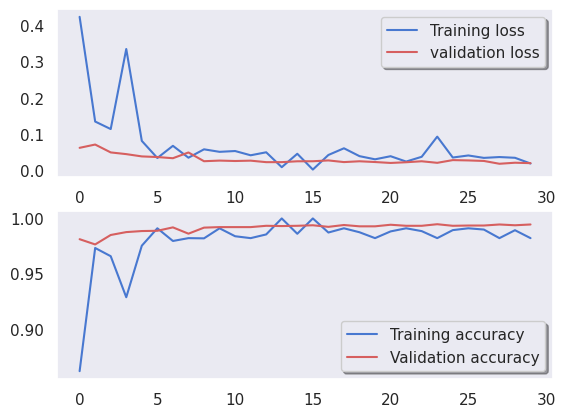

In [37]:
# Plot the loss and accuracy curves for training and validation
print('LOSS must go down to zero')
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

print('ACCURACY must go up to one')
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Confusion Matrix Plotting
Confusion Matrix is another way of model evaluation. It is used for grphical representation of performance of the model. It shows the performance of Model in predicting every class. Here you can find the model pretty accurately predict the relevant classes.

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


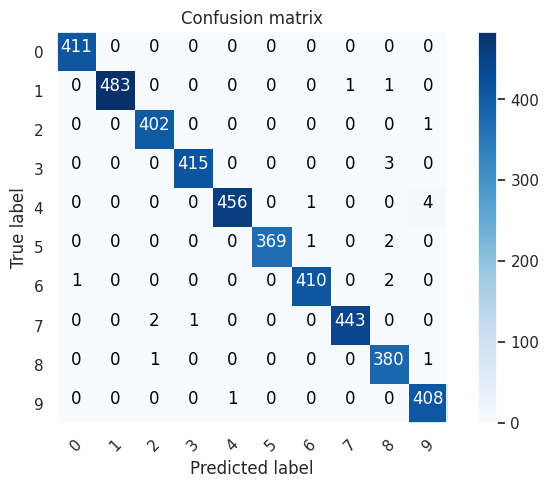

In [38]:
# Look at confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

### Important Error
Though we may have very high accuracy, any deep learing model cannot correctly predict all the images. So we are viewing the important errors done by our model for perspection.

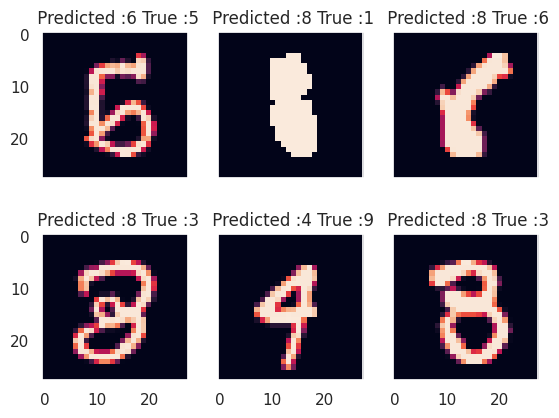

In [39]:
# Display some error results

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 6. Predicting the test data
Finally we are predicting the test dataset for the competition afer done training and performance evaluation. We predict the test data and store it in a csv file for competition submission.

In [40]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
